# Random Forest with K-Folds Cross Validation

Used lending data from 2007-2010 and try to classify and predict whether or not the borrower paid back their loan in full. Data can be found: (https://www.lendingclub.com/info/download-data.action) 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

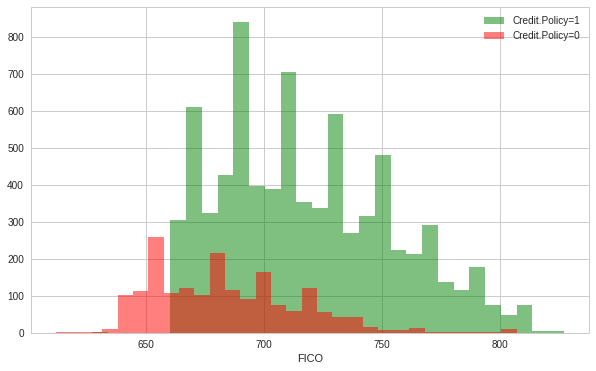

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='green',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

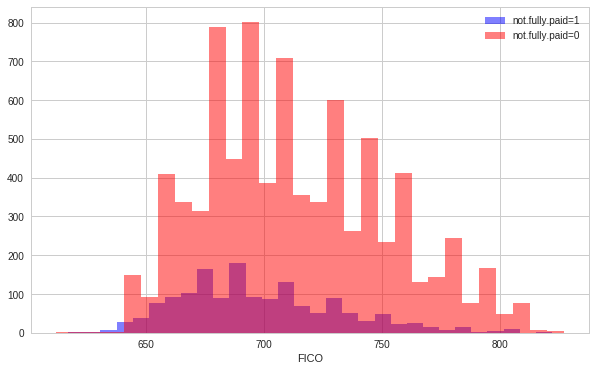

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

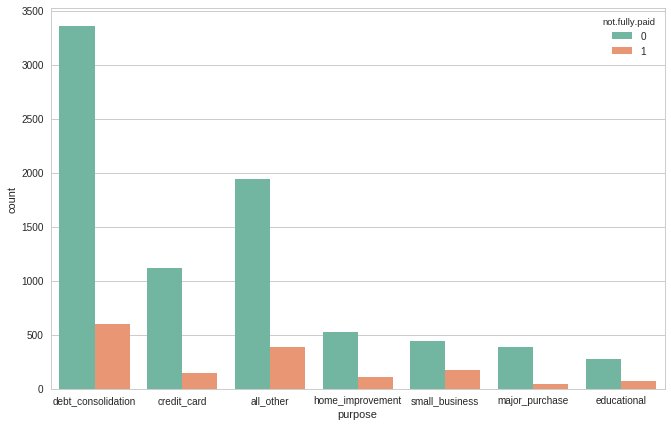

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set2')

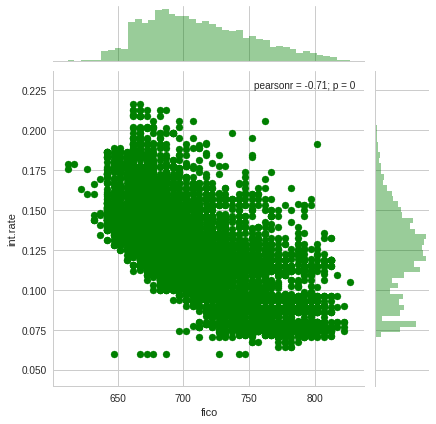

In [9]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='green')

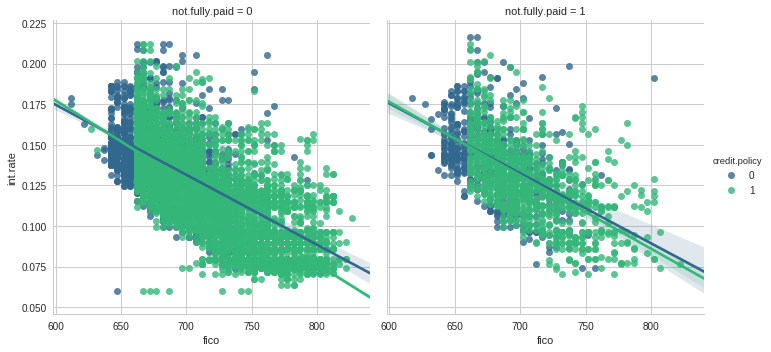

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='viridis')

## Transforming catigorical features

In [11]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
purpose = pd.get_dummies(loans['purpose'],drop_first=True)

In [13]:
loan_data=loans.drop(['purpose'],axis=1)

In [14]:
loan_data=pd.concat([loan_data,purpose],axis=1)

In [15]:
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = loan_data.drop('not.fully.paid',axis=1)
y = loan_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [21]:
predictions = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.83      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



In [24]:
print(confusion_matrix(y_test,predictions))

[[1985  446]
 [ 341  102]]


## Training the Random Forest model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=600)

In [27]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Predictions and Evaluation

In [32]:
predictions = rfc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.50      0.02      0.03       443

avg / total       0.79      0.85      0.78      2874



In [35]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 435    8]]


In [36]:
accuracy_score(y_test,predictions)

0.8458594293667363

## K-Folds Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)

In [39]:
accuracies.mean()

0.83547167293191271

In [40]:
accuracies.std()

0.0036996825958019093

Based on the acuracy similarity the predicting sample was representative.

#### Random Forest Optimization with Grid Search and K-Folds Cross Validation

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameters = [{'n_estimators': [500, 750, 1000]}]

In [44]:
grid_search = GridSearchCV(estimator = rfc, param_grid = parameters,                           
                           cv = 10, verbose=3)

In [45]:
grid_search = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] n_estimators=500 ................................................
[CV] ................. n_estimators=500, score=0.837556, total=   6.9s
[CV] n_estimators=500 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] ................. n_estimators=500, score=0.834575, total=   6.9s
[CV] n_estimators=500 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.0s remaining:    0.0s


[CV] ................. n_estimators=500, score=0.825633, total=   6.7s
[CV] n_estimators=500 ................................................
[CV] ................. n_estimators=500, score=0.840537, total=   6.7s
[CV] n_estimators=500 ................................................
[CV] ................. n_estimators=500, score=0.835821, total=   6.6s
[CV] n_estimators=500 ................................................
[CV] ................. n_estimators=500, score=0.835821, total=   6.7s
[CV] n_estimators=500 ................................................
[CV] ................. n_estimators=500, score=0.838806, total=   6.7s
[CV] n_estimators=500 ................................................
[CV] ................. n_estimators=500, score=0.831343, total=   6.6s
[CV] n_estimators=500 ................................................
[CV] ................. n_estimators=500, score=0.835821, total=   6.7s
[CV] n_estimators=500 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.4min finished


In [46]:
best_accuracy = grid_search.best_score_
best_accuracy

0.83576968973747012

In [47]:
best_parameters = grid_search.best_params_
best_parameters 

{'n_estimators': 1000}

In [48]:
grid_search.cv_results_ 

{'mean_fit_time': array([  6.61361043,   9.61065168,  12.87745788]),
 'mean_score_time': array([ 0.13156185,  0.1949842 ,  0.24379086]),
 'mean_test_score': array([ 0.8353222 ,  0.83562053,  0.83576969]),
 'mean_train_score': array([ 1.,  1.,  1.]),
 'param_n_estimators': masked_array(data = [500 750 1000],
              mask = [False False False],
        fill_value = ?),
 'params': ({'n_estimators': 500},
  {'n_estimators': 750},
  {'n_estimators': 1000}),
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([ 0.83755589,  0.83755589,  0.83755589]),
 'split0_train_score': array([ 1.,  1.,  1.]),
 'split1_test_score': array([ 0.83457526,  0.83606557,  0.83606557]),
 'split1_train_score': array([ 1.,  1.,  1.]),
 'split2_test_score': array([ 0.82563338,  0.82861401,  0.82861401]),
 'split2_train_score': array([ 1.,  1.,  1.]),
 'split3_test_score': array([ 0.84053651,  0.84202683,  0.84053651]),
 'split3_train_score': array([ 1.,  1.,  1.]),
 'split4_test_scor

## Individual Customer Predition
Based on the information in the np.array will the new customer not pay in full

In [52]:
new_customer= grid_search.predict(np.array([[1,0.1,829.1,11.3,19.43,737.5,5639.5,28854.2,52.1,0,0,0,0,0,0,0,1,0]]))
new_customer

array([0])

* 1 = not paid in full
* 0 = paid in full

Therefore new customer will pay back loan.

## Conclusion

The Random Forest outperformed a Single Decision Tree.
K-Folds Cross Validation proved the accurcies in the sample were representative of data set and the standard deviation between folds was 0.3%

A grid search was performed to optimize the number of trees selection.  The intial size of 600 was used but improvement was found at 1000 trees however it was marginal.  

### Results:
* The Mean Accuracy of  600 trees and 10 folds was 83.5471% 
* The Mean Accuracy of 1000 trees and 10 folds was 83.5477% 
